- Be sure current working directory is 'demo/' folder:

In [54]:
import os
os.getcwd()

'/home/fatihakyon/dev/obss/sahi/demo'

- Import required functions:

In [1]:
from sahi.slicing import slice_coco
from sahi.utils.file import load_json

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

## 1. Slicing COCO Dataset into Grids

- Visualize original image and annotations:

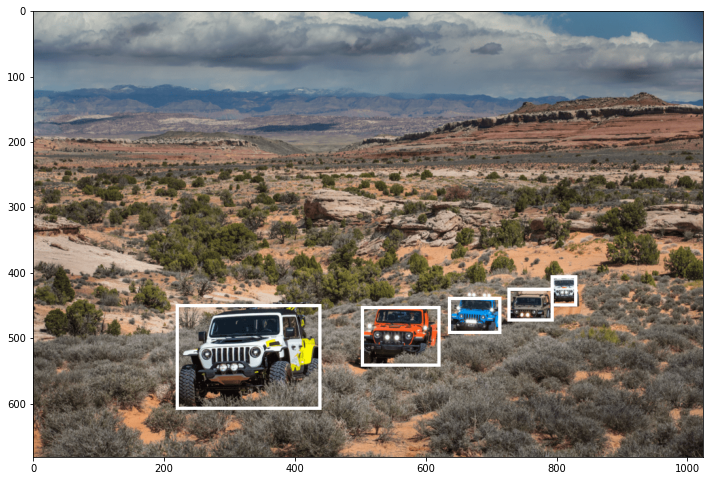

In [29]:
coco_dict = load_json("demo_data/terrain2_coco.json")

f, axarr = plt.subplots(1, 1, figsize=(12, 12))
# read image
img_ind = 0
img = Image.open("demo_data/" + coco_dict["images"][img_ind]["file_name"]).convert('RGBA')
# iterate over all annotations
for ann_ind in range(len(coco_dict["annotations"])):
    # convert coco bbox to pil bbox
    xywh = coco_dict["annotations"][ann_ind]["bbox"]
    xyxy = [xywh[0], xywh[1], xywh[0]+xywh[2], xywh[1]+xywh[3]]
    # visualize bbox over image
    ImageDraw.Draw(img, 'RGBA').rectangle(xyxy, width=5)
axarr.imshow(img)

- To slice a COCO dataset annoations an images, we need to specify slice parameters. In this example we will ice images into 256x256 grids overlap ratio of 0.2:

In [22]:
coco_dict, coco_path = slice_coco(
    coco_annotation_file_path="demo_data/terrain2_coco.json",
    image_dir="demo_data/",
    output_coco_annotation_file_name="sliced_coco.json",
    ignore_negative_samples=False,
    output_dir="demo_data/sliced/",
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

100%|██████████| 1/1 [00:00<00:00, 10.68it/s]


- Visualize sliced images:

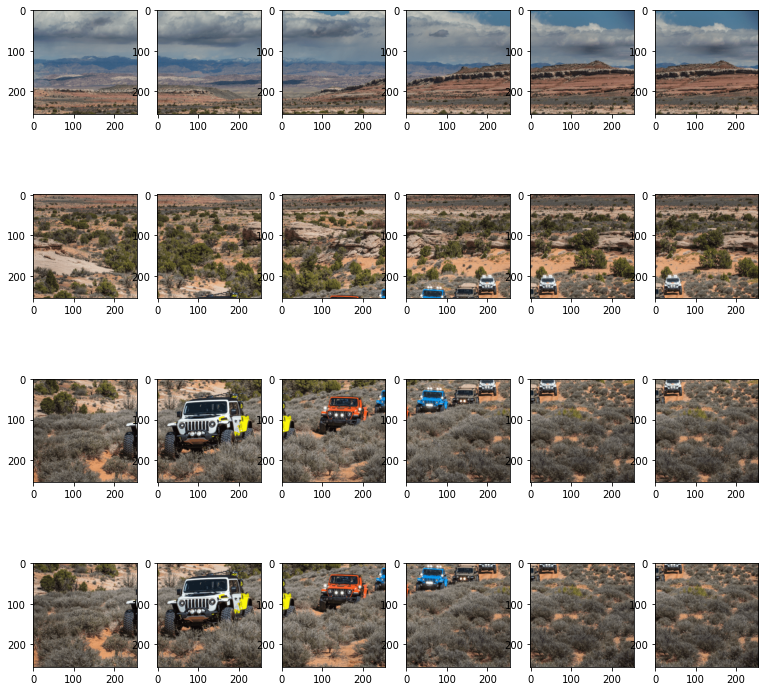

In [23]:
f, axarr = plt.subplots(4, 6, figsize=(13,13))
img_ind = 0
for ind1 in range(4):
    for ind2 in range(6):
        img = Image.open("demo_data/sliced/" + coco_dict["images"][img_ind]["file_name"])
        axarr[ind1, ind2].imshow(img)
        img_ind += 1

- Visualize sliced annotations on sliced images:

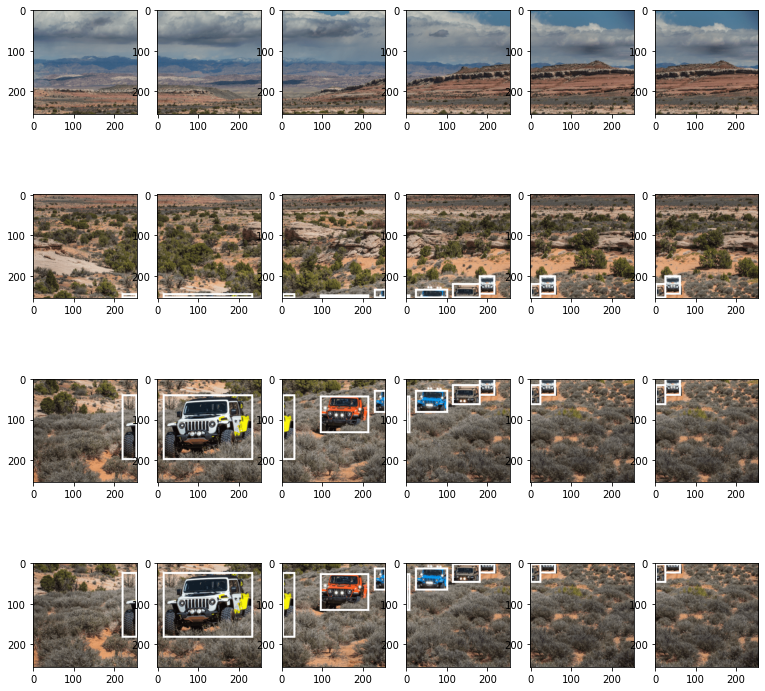

In [24]:
f, axarr = plt.subplots(4, 6, figsize=(13,13))
img_ind = 0
for row_ind in range(4):
    for column_ind in range(6):
        # read image
        img = Image.open("demo_data/sliced/" + coco_dict["images"][img_ind]["file_name"])
        # iterate over all annotations
        for ann_ind in range(len(coco_dict["annotations"])):
            # find annotations that belong the selected image
            if coco_dict["annotations"][ann_ind]["image_id"] == coco_dict["images"][img_ind]["id"]:
                # convert coco bbox to pil bbox
                xywh = coco_dict["annotations"][ann_ind]["bbox"]
                xyxy = [xywh[0], xywh[1], xywh[0]+xywh[2], xywh[1]+xywh[3]]
                # visualize bbox over image
                ImageDraw.Draw(img, 'RGBA').rectangle(xyxy, width=5)
            axarr[row_ind, column_ind].imshow(img)
        img_ind += 1
